# Regression- EV Fiyatları Tahmini

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# EDA - Exploratory Data Analysis - VERİYİ ANALİZ ETME

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe() #istatiksel veriler

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [9]:
import seaborn as sns

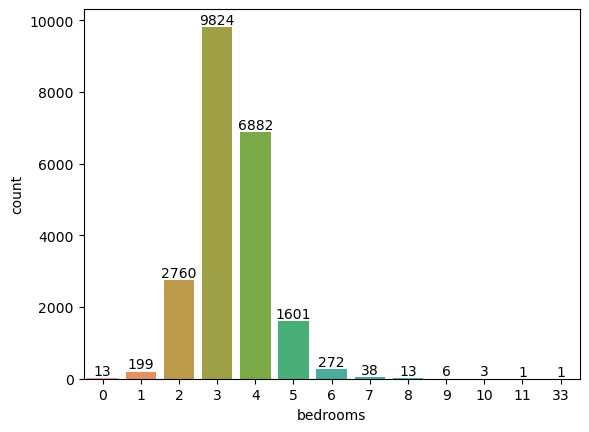

In [10]:
ax=sns.countplot(x=df['bedrooms'])
ax.bar_label(ax.containers[0]);

In [13]:
import matplotlib.pyplot as plt

<Axes: >

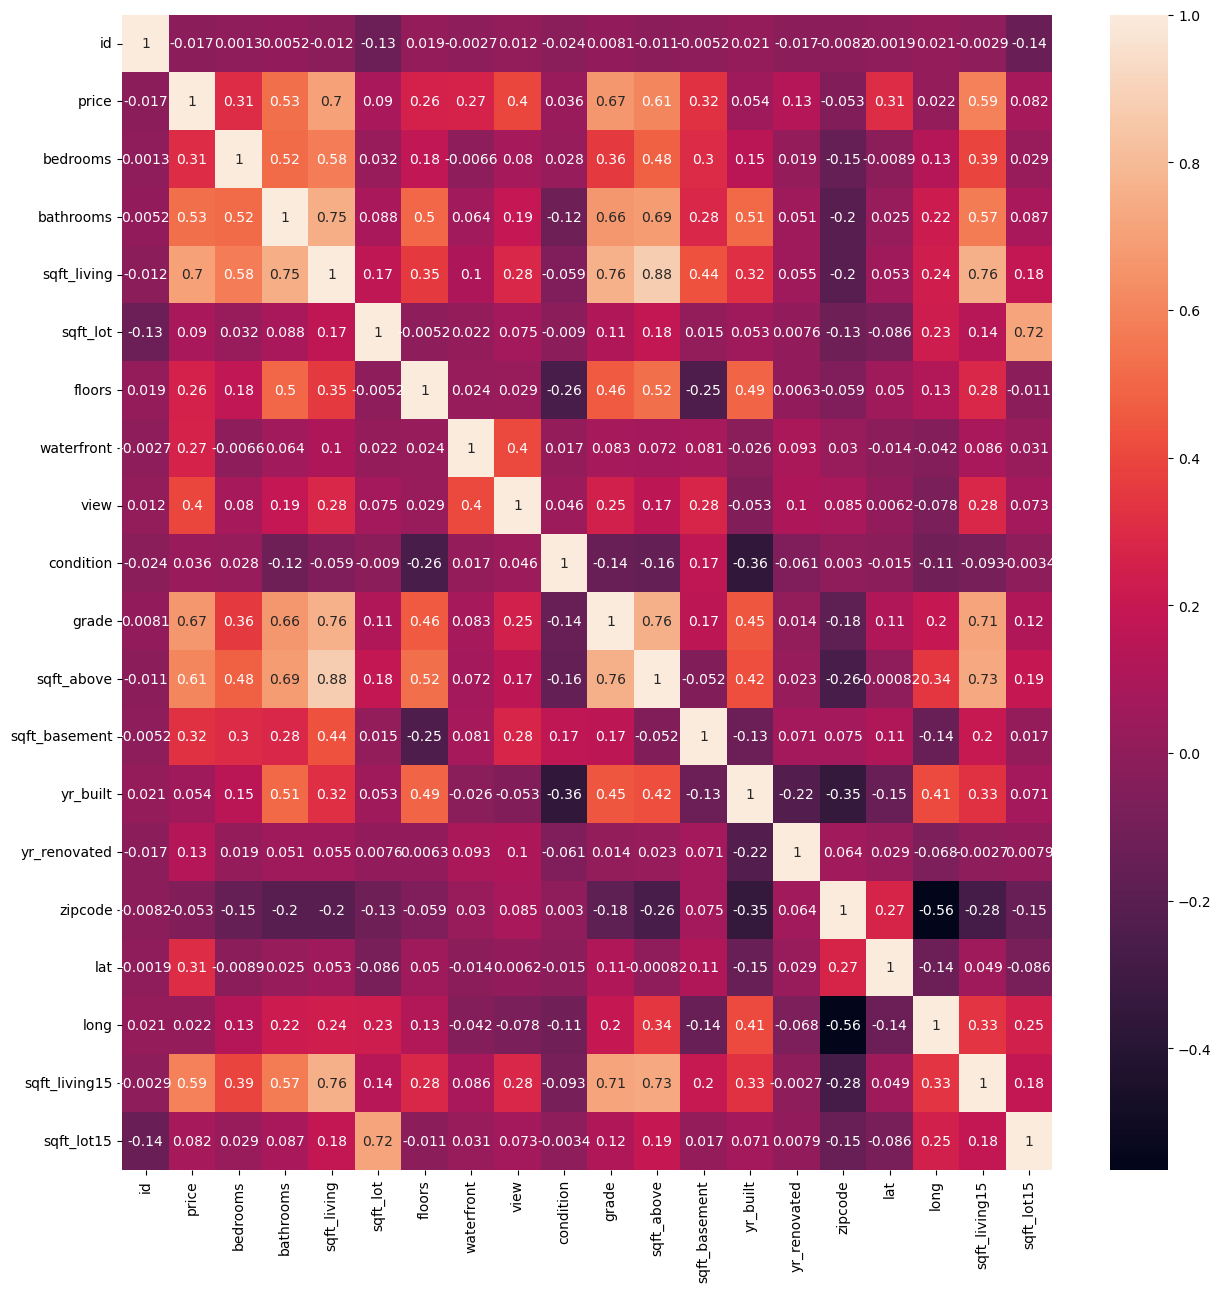

In [15]:
ax=plt.figure(figsize=(15,15));
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [16]:
#abs =mutlak edğer - python otomatik biliyor

In [17]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
zipcode          0.053203
Name: price, dtype: float64

In [18]:
#regression kuralalrı 1
#Correlation- Korelasyon 0.20 nin üstü ve 0.90 nın altındaki satırları alacağız
#0,20 nin altı katkısı az
#0,90 üstünde veri kendini tekrar ediyor

# Modelleme

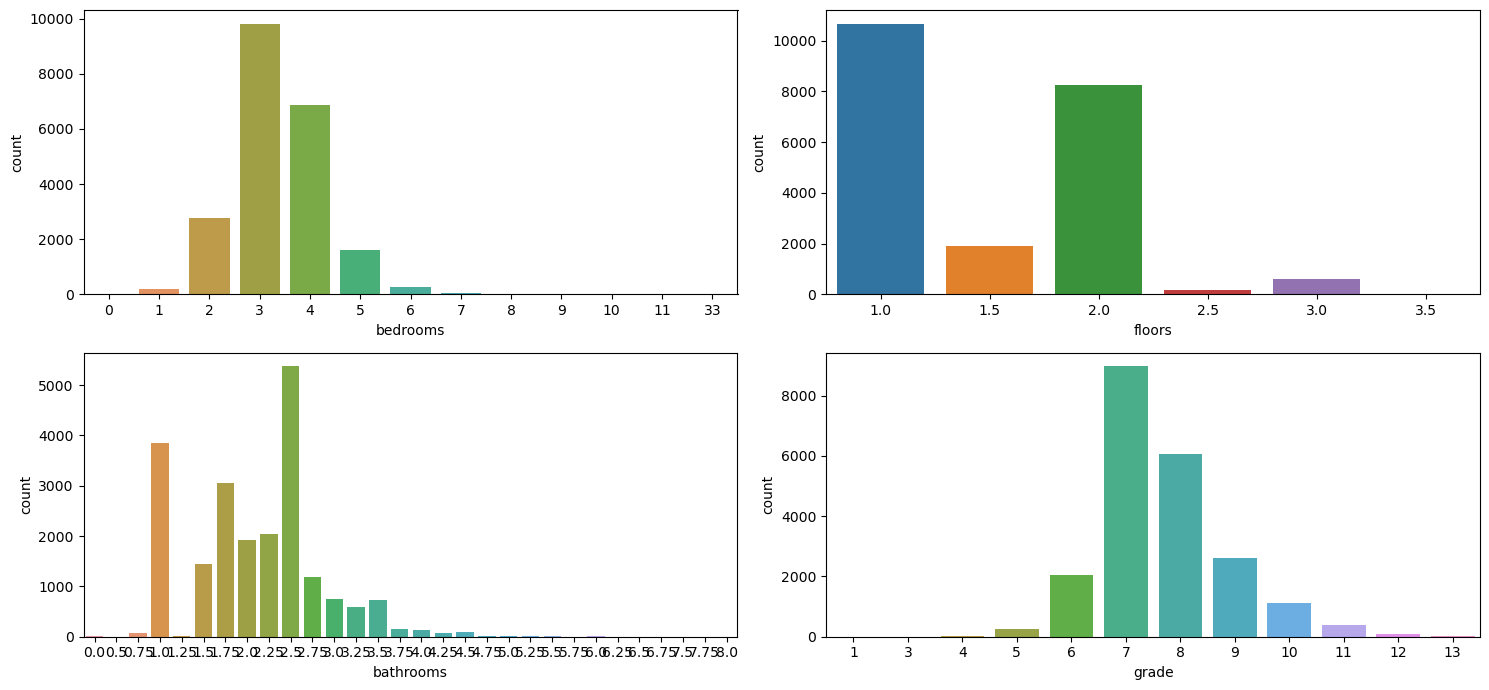

In [22]:
fig=plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(x=df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(x=df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(x=df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(x=df['grade'])
plt.tight_layout()

Feature Engineering
Elimizdeki verilerle bir çıkarım yaparak yeni veri oluşturmak- örnek, binanın yapım yılından binanın yaşını çıkarıp sütun haline getirmek

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
df["zipcode"]=df["zipcode"].astype("category")

In [68]:
df=df[df["bedrooms"]<10]

In [69]:
df=df[df["bathrooms"]<7]

In [70]:
df["bedrooms"]=df["bedrooms"]**2

In [71]:
df["age"]=2022-df["yr_built"]

In [72]:
df["bedrooms"]=df["bedrooms"]**2

In [73]:
import numpy as np
df['basement']=np.where(df['sqft_basement']>0,1,0)
df['renovated']=np.where(df['yr_renovated']>0,1,0)


In [74]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'basement',
       'renovated'],
      dtype='object')

In [75]:
df.quantile(.97).astype('int')

id              -2147483648
price                647449
bedrooms                  1
bathrooms                 2
sqft_living            2035
sqft_lot              90169
floors                    2
waterfront                0
view                      3
condition                 5
grade                     8
sqft_above             1713
sqft_basement           642
yr_built               2007
yr_renovated           1993
lat                      47
long                   -121
sqft_living15          2514
sqft_lot15            84157
age                     116
basement                  1
renovated                 1
Name: 0.97, dtype: int32

In [76]:
outliers=df.quantile(.97)
df=df[(df['price']<outliers['price'])]
df=df[(df['bedrooms']<outliers['bedrooms'])]
df=df[(df['sqft_living']<outliers['sqft_living'])]

In [77]:
x.head()

,condition,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,basement,bedrooms,waterfront,zipcode,floors,renovated,age
0,3,1180,7,1180,1340,1.00,0,0,81,0,98178,1.0,0,67
1,3,2570,7,2170,1690,2.25,0,1,81,0,98125,2.0,1,71
2,3,770,6,770,2720,1.00,0,0,16,0,98028,1.0,0,89
3,5,1960,7,1050,1360,3.00,0,1,256,0,98136,1.0,0,57
4,3,1680,8,1680,1800,2.00,0,0,81,0,98074,1.0,0,35


In [64]:
x=df[["condition","sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","basement","bedrooms","waterfront","zipcode","floors","renovated","age"]]
y=df[["price"]]

In [78]:
x=pd.get_dummies(x,drop_first=True)

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [96]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15227, 82), (3807, 82), (15227, 1), (3807, 1))

In [97]:
lr=LinearRegression()
regnodel=lr.fit(x_train,y_train)

In [98]:
y_pretest=regnodel.predict(x_test)

In [99]:
(mean_squared_error(y_test,y_pretest))**0.5

94438.29443998997

In [100]:
r2_score(y_test,y_pretest)

0.8257771254256768

In [101]:
from sklearn.linear_model import Ridge,Lasso

In [111]:
R=Ridge()

R.fit(x_train,y_train)
y_pred_ridge=R.predict(x_test)

In [112]:
tahmin2=R.predict(x_test)

In [113]:
r2_score(tahmin2,y_test)

0.7849472965299015

In [114]:
(mean_squared_error(tahmin2,y_test))**0.5

94625.2961864116

In [115]:
L=Lasso()

L.fit(x_train,y_train)
y_pred_lasso=L.predict(x_test)

y_pred_lasso

array([759469.77400367, 141999.43913023, 422126.88642797, ...,
       472973.01605357, 474583.34484008, 608418.916808  ])

In [116]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

94439.9061964005

In [118]:
r2_score(y_test,y_pred_lasso)

0.8257711785323569